In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv("C:\JyotiLearnings\GitDemo\Python_ExploratoryDataAnalysis\Diwali Sales Data.csv",encoding='unicode_escape')
df.head
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [46]:
#data Cleaning for Status and unnamed1 column as they are blank that is 0 axis means complete row inplace means change is also to be saved
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11251 non-null  int32  
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(2), int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [50]:
#DataCleaning for null values
pd.isnull(df)



(11251, 13)

In [51]:
#find null values with sum operation
pd.isnull(df).sum()
df.shape


(11251, 13)

In [52]:
#Amount has null values so delete That and check with df.shape() previously there were 11251 entries
df.dropna(inplace=True)
df.shape


(11239, 13)

In [38]:
#now change dataType astype () gives an error so used apply()
df['Amount'] = df['Amount'].astype('int')

In [87]:
df['Amount'].dtypes

dtype('int32')

In [88]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9443.527598,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5228.683337,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,0.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5440.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8108.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [89]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9443.527598
std,12.754122,1.115047,5228.683337
min,12.000000,1.000000,0.000000
25%,27.000000,1.500000,5440.000000
50%,33.000000,2.000000,8108.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


In [90]:
#Exploratory Data Analysis (EDA)

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

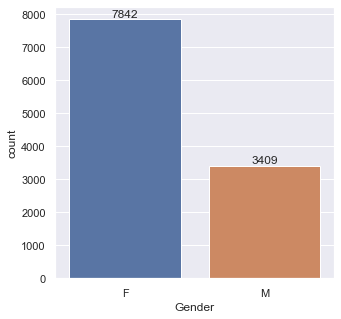

In [91]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [92]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

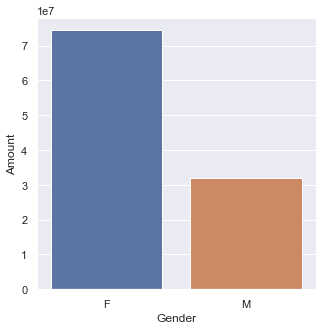

In [93]:
#Buyers Gender

sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False) 
sns.barplot(x='Gender',y='Amount',data=sales_gen)

from abolve graphs Females are most of the buyers and they have more purchasing power than men

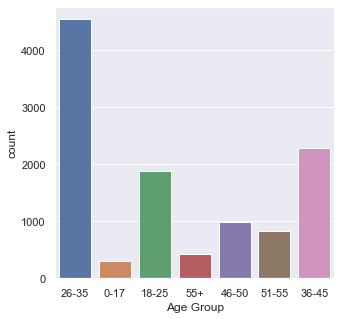

In [94]:
ax=sns.countplot(data=df,x='Age Group')


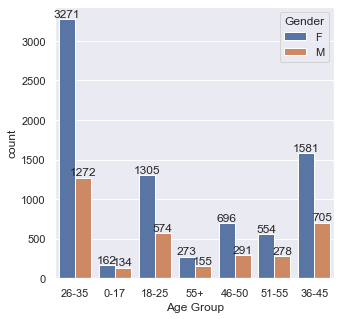

In [95]:
# Buyers Age Group

ax=sns.countplot(data=df,x='Age Group',hue='Gender') # hue will divide data values in male female
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

State




<AxesSubplot:xlabel='State', ylabel='Orders'>

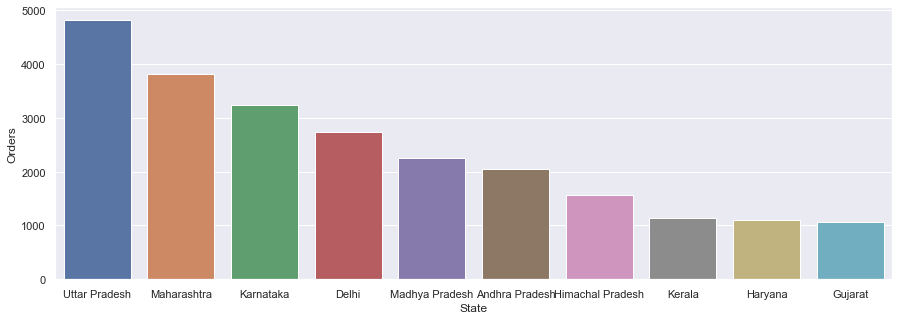

In [96]:

# total number of orders from top 10 States
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Orders')

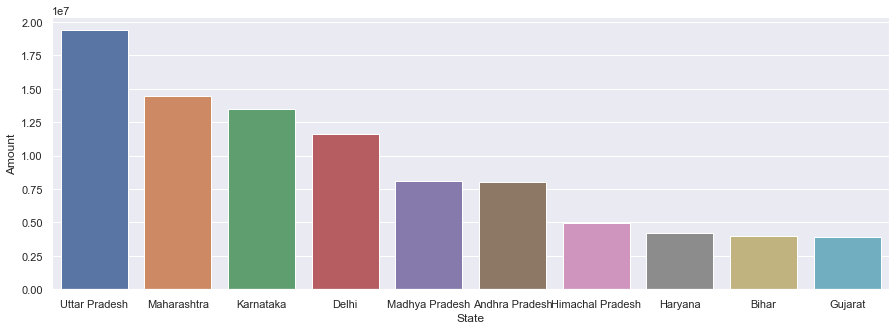

In [100]:
# total Amount of Sales from top 10 States
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

ax=sns.barplot(data=sales_state,x='State',y='Amount')


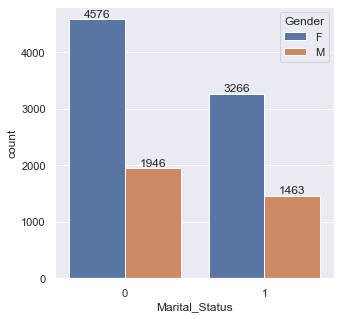

In [107]:
sns.set(rc={'figure.figsize':(5,5)})

ax=sns.countplot(x='Marital_Status',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

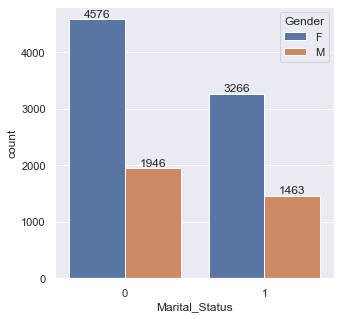

In [108]:
sns.set(rc={'figure.figsize':(5,5)})

ax=sns.countplot(x='Marital_Status',data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

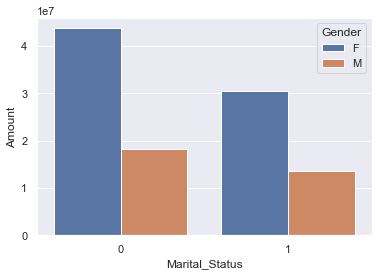

In [119]:
sales=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')


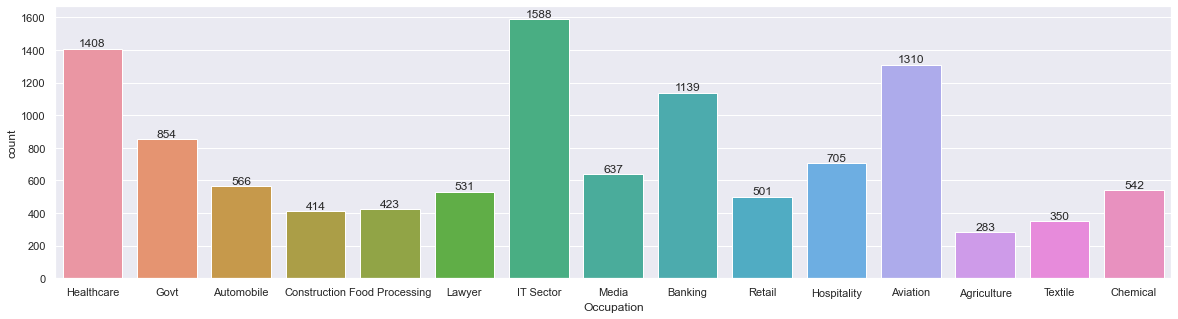

In [120]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

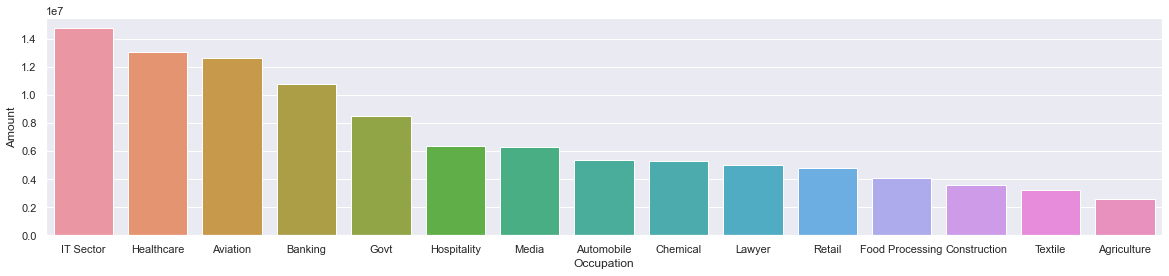

In [125]:
sales=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,4)})
sns.barplot(data=sales,x='Occupation',y='Amount')

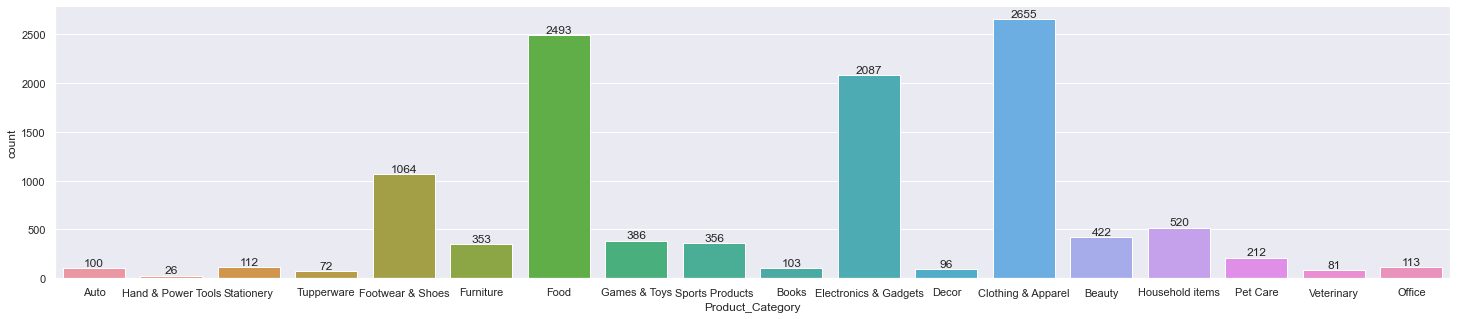

In [127]:
sns.set(rc={'figure.figsize':(25,5)})
ax=sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

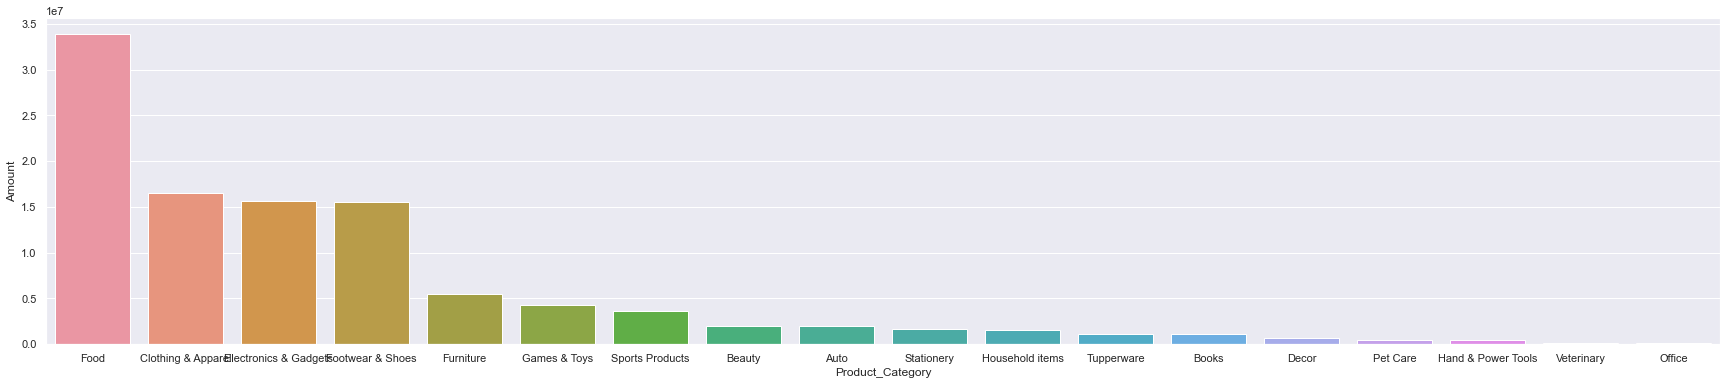

In [135]:
sales=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(30,6)})
sns.barplot(data=sales,x='Product_Category',y='Amount')

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

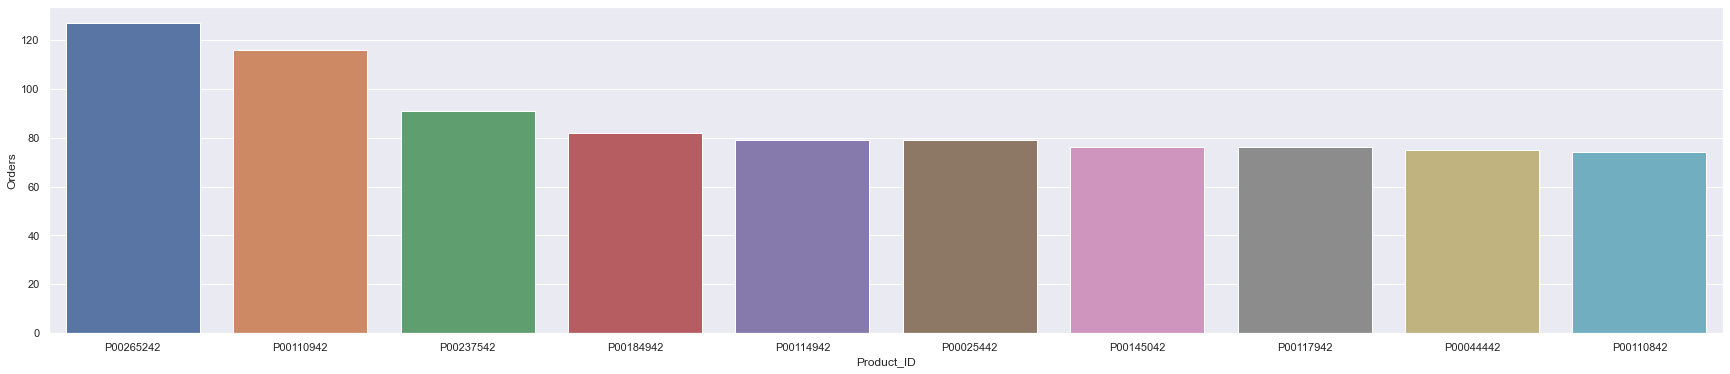

In [138]:
#Top 10 most sold products

sales=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(30,6)})
sns.barplot(data=sales,x='Product_ID',y='Orders')

<AxesSubplot:xlabel='Product_ID'>

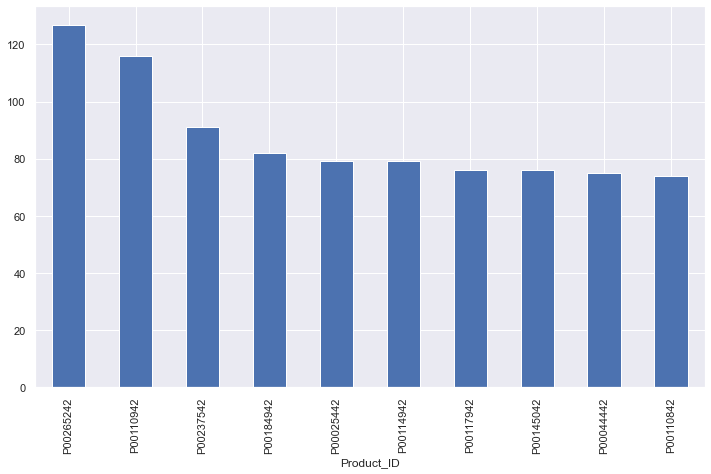

In [144]:
fig1,ax1=plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')